In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,684270,0,0,revernus,525,150,1,6.5,"August 3, 2021","The story is kind of ""meh"", but it doesn't mat..."
1,684270,1,0,Vazzaroth,952,142,-1,1.2,"July 28, 2021","So, I didn't like this game, but some people w..."
2,684270,0,0,magikaru,467,28,1,11.7,"July 7, 2021",Excellent engineering puzzle game. Easy recomm...
3,684270,1,0,76561198010952884,206,2,1,54.2,"July 7, 2021",it's nice game. computer science/architecture ...
4,684270,0,0,HurricaneSan,756,73,1,6.3,"July 2, 2021",A very nice and challenging programming game.I...


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,1,6.5,"August 3, 2021","The story is kind of ""meh"", but it doesn't mat..."
1,1,0,-1,1.2,"July 28, 2021","So, I didn't like this game, but some people w..."
2,0,0,1,11.7,"July 7, 2021",Excellent engineering puzzle game. Easy recomm...
3,1,0,1,54.2,"July 7, 2021",it's nice game. computer science/architecture ...
4,0,0,1,6.3,"July 2, 2021",A very nice and challenging programming game.I...


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"August 3, 2021","The story is kind of ""meh"", but it doesn't mat...",0,0,6.5,1
1,"July 28, 2021","So, I didn't like this game, but some people w...",1,0,1.2,-1
2,"July 7, 2021",Excellent engineering puzzle game. Easy recomm...,0,0,11.7,1
3,"July 7, 2021",it's nice game. computer science/architecture ...,1,0,54.2,1
4,"July 2, 2021",A very nice and challenging programming game.I...,0,0,6.3,1
5,"June 17, 2021",This is an essential game for everyone who wor...,0,0,52.7,1
6,"June 17, 2021",A bit of a brain-teaser but one that is so fun...,0,0,0.2,1
7,"February 19, 2021",nice,0,0,8.8,1
8,"December 27, 2020",I agree with every negative review as well. It...,7,0,7.9,-1
9,"December 25, 2020",Words cannot describe how much I love this gam...,0,0,11.0,1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  188 non-null    object 
 1   Review_Text     188 non-null    object 
 2   Num_Helpful     188 non-null    int64  
 3   Num_Funny       188 non-null    int64  
 4   Hours_Played    188 non-null    float64
 5   Recommend       188 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 8.9+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_20728/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"August 3, 2021","The story is kind of ""meh"", but it doesn't mat...",0,0,6.5,1,1627948800
1,"July 28, 2021","So, I didn't like this game, but some people w...",1,0,1.2,-1,1627430400
2,"July 7, 2021",Excellent engineering puzzle game. Easy recomm...,0,0,11.7,1,1625616000
3,"July 7, 2021",it's nice game. computer science/architecture ...,1,0,54.2,1,1625616000
4,"July 2, 2021",A very nice and challenging programming game.I...,0,0,6.3,1,1625184000


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_20728/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"August 3, 2021","The story is kind of ""meh"", but it doesn't mat...",0,0,6.5,1,1627948800,2691
1,"July 28, 2021","So, I didn't like this game, but some people w...",1,0,1.2,-1,1627430400,2690
2,"July 7, 2021",Excellent engineering puzzle game. Easy recomm...,0,0,11.7,1,1625616000,2687
3,"July 7, 2021",it's nice game. computer science/architecture ...,1,0,54.2,1,1625616000,2687
4,"July 2, 2021",A very nice and challenging programming game.I...,0,0,6.3,1,1625184000,2687


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"August 3, 2021","The story is kind of ""meh"", but it doesn't mat...",0,0,6.5,1,1627948800,2691
1,"July 28, 2021","So, I didn't like this game, but some people w...",1,0,1.2,-1,1627430400,2690
2,"July 7, 2021",Excellent engineering puzzle game. Easy recomm...,0,0,11.7,1,1625616000,2687
3,"July 7, 2021",it's nice game. computer science/architecture ...,1,0,54.2,1,1625616000,2687
4,"July 2, 2021",A very nice and challenging programming game.I...,0,0,6.3,1,1625184000,2687


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2691,"August 3, 2021","The story is kind of ""meh"", but it doesn't mat..."
1,2690,"July 28, 2021","So, I didn't like this game, but some people w..."
2,2687,"July 7, 2021",Excellent engineering puzzle game. Easy recomm...
3,2687,"July 7, 2021",it's nice game. computer science/architecture ...
4,2687,"July 2, 2021",A very nice and challenging programming game.I...


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2489,"September 18, 2017",13
1,2489,"September 19, 2017",6
2,2489,"September 20, 2017",5
3,2490,"September 21, 2017",2
4,2490,"September 22, 2017",2
...,...,...,...
121,2685,"June 17, 2021",4
122,2687,"July 2, 2021",2
123,2687,"July 7, 2021",4
124,2690,"July 28, 2021",2


<AxesSubplot:>

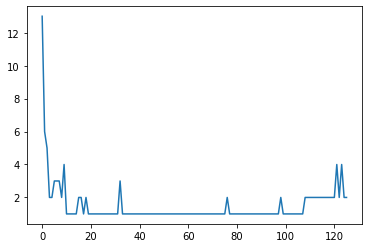

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

188

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

1.492063492063492

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2489,24
1,2490,15
2,2491,8
3,2492,6
4,2493,3
...,...,...
69,2668,2
70,2685,4
71,2687,6
72,2690,2


<AxesSubplot:>

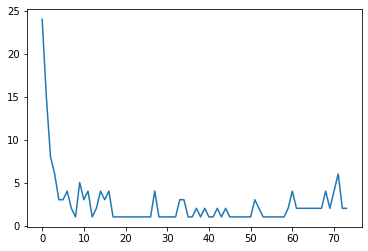

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

188

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

2.5405405405405403

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"August 3, 2021","The story is kind of ""meh"", but it doesn't mat...",0,0,6.5,1,1627948800,2691
1,"July 28, 2021","So, I didn't like this game, but some people w...",1,0,1.2,-1,1627430400,2690
2,"July 7, 2021",Excellent engineering puzzle game. Easy recomm...,0,0,11.7,1,1625616000,2687
3,"July 7, 2021",it's nice game. computer science/architecture ...,1,0,54.2,1,1625616000,2687
4,"July 2, 2021",A very nice and challenging programming game.I...,0,0,6.3,1,1625184000,2687


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2489,222
1,2490,19
2,2491,52
3,2492,49
4,2493,21
...,...,...
69,2668,0
70,2685,0
71,2687,2
72,2690,2


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2489,50,0,3.0,9.250000
2490,15,0,0.0,1.266667
2491,25,0,0.5,6.500000
2492,27,0,0.0,8.166667
2493,16,1,4.0,7.000000
...,...,...,...,...
2668,0,0,0.0,0.000000
2685,0,0,0.0,0.000000
2687,1,0,0.0,0.333333


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

678

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

3.606382978723404

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2489,54
1,2490,2
2,2491,11
3,2492,7
4,2493,14
...,...,...
69,2668,0
70,2685,0
71,2687,0
72,2690,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2489,48,0,0.0,2.250000
2490,1,0,0.0,0.133333
2491,6,0,0.0,1.375000
2492,5,0,0.0,1.166667
2493,9,0,5.0,4.666667
...,...,...,...,...
2668,0,0,0.0,0.000000
2685,0,0,0.0,0.000000
2687,0,0,0.0,0.000000


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

107

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.5691489361702128

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2489,417.5
1,2490,387.3
2,2491,62.6
3,2492,133.9
4,2493,38.1
...,...,...
69,2668,17.6
70,2685,105.8
71,2687,144.4
72,2690,2.4


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2489,125.6,0.4,7.75,17.395833
2490,182.7,3.0,9.30,25.820000
2491,16.1,1.7,6.85,7.825000
2492,85.5,1.6,8.40,22.316667
2493,18.3,7.1,12.70,12.700000
...,...,...,...,...
2668,8.8,8.8,8.80,8.800000
2685,52.7,0.2,26.45,26.450000
2687,54.2,6.3,11.70,24.066667


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

4173.5

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

22.19946808510639

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2489,1.000000
1,2490,0.866667
2,2491,0.750000
3,2492,0.666667
4,2493,1.000000
...,...,...
69,2668,1.000000
70,2685,1.000000
71,2687,1.000000
72,2690,-1.000000


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2489,1,1,1.0,1.000000
2490,1,-1,1.0,0.866667
2491,1,-1,1.0,0.750000
2492,1,-1,1.0,0.666667
2493,1,1,1.0,1.000000
...,...,...,...,...
2668,1,1,1.0,1.000000
2685,1,1,1.0,1.000000
2687,1,1,1.0,1.000000


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

156

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.8297872340425532

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"August 3, 2021","The story is kind of ""meh"", but it doesn't mat...",0,0,6.5,1,1627948800,2691
1,"July 28, 2021","So, I didn't like this game, but some people w...",1,0,1.2,-1,1627430400,2690
2,"July 7, 2021",Excellent engineering puzzle game. Easy recomm...,0,0,11.7,1,1625616000,2687
3,"July 7, 2021",it's nice game. computer science/architecture ...,1,0,54.2,1,1625616000,2687
4,"July 2, 2021",A very nice and challenging programming game.I...,0,0,6.3,1,1625184000,2687


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"August 3, 2021","The story is kind of ""meh"", but it doesn't mat...",0,0,0.034521,1.0,1.000000,2691
1,"July 28, 2021","So, I didn't like this game, but some people w...",1,0,0.005479,0.0,0.995760,2690
2,"July 7, 2021",Excellent engineering puzzle game. Easy recomm...,0,0,0.063014,1.0,0.980919,2687
3,"July 7, 2021",it's nice game. computer science/architecture ...,1,0,0.295890,1.0,0.980919,2687
4,"July 2, 2021",A very nice and challenging programming game.I...,0,0,0.033425,1.0,0.977385,2687
...,...,...,...,...,...,...,...,...
183,"September 18, 2017",I was lucky enough to play this game while sti...,50,1,0.016986,1.0,0.000000,2489
184,"September 18, 2017","Okay so, I've never played any programming gam...",10,0,0.027397,1.0,0.000000,2489
185,"September 18, 2017","This is really fun and promising game, it is i...",15,0,0.038356,1.0,0.000000,2489
186,"September 18, 2017",I've played just under 30 minutes when I wrote...,3,0,0.007671,1.0,0.000000,2489


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_20728/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"August 3, 2021","The story is kind of ""meh"", but it doesn't mat...",0,0,0.034521,1.0,1.000000,2691
1,"August 3, 2021","The story is kind of ""meh"", but it doesn't mat...",0,0,0.034521,1.0,1.000000,2691
2,"July 28, 2021","So, I didn't like this game, but some people w...",1,0,0.005479,0.0,0.995760,2690
3,"July 28, 2021","So, I didn't like this game, but some people w...",1,0,0.005479,0.0,0.995760,2690
4,"July 7, 2021",Excellent engineering puzzle game. Easy recomm...,0,0,0.063014,1.0,0.980919,2687
5,"July 7, 2021",it's nice game. computer science/architecture ...,1,0,0.295890,1.0,0.980919,2687
6,"July 7, 2021",Excellent engineering puzzle game. Easy recomm...,0,0,0.063014,1.0,0.980919,2687
7,"July 7, 2021",it's nice game. computer science/architecture ...,1,0,0.295890,1.0,0.980919,2687
8,"July 2, 2021",A very nice and challenging programming game.I...,0,0,0.033425,1.0,0.977385,2687
9,"July 2, 2021",A very nice and challenging programming game.I...,0,0,0.033425,1.0,0.977385,2687


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2489    [Seems to be a fun game.Didn't play it for ver...
2490    [This game is annoying. It shows you new build...
2491    [:thumbup:, its a zach like, its not zachtroni...
2492    [Take a Zachtronics game, remove all the fun e...
2493    [Very thoroughly addictive. A must-play for an...
2494    [A must buy if you played TIS-100 and Shenzen ...
2495    [Why buy this game?Well, "game" is a bit of an...
2496    [Really cool game about designing a CPU. Remin...
2497    [Would you be interested in knowing (and desig...
2498    [A brilliant way to introduce children to logi...
2499    [had to break out my computer architecture not...
2500    [Amazing game; equal in quality and depth to Z...
2501    [Great game for those of us who want logic puz...
2502    [Loved it!, This is a great way for learning t...
2503    [Amazing game. If you liked TIS-100 or Human R...
2504    [If you're a fan of Zachtronics games like TIS...
2505    [Coming to write this review after reading the..

In [52]:
# storing data in JSON format
df_text_list.to_json('siliconzeroes_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('siliconzeroes_text.json')
print(game_text)

           name  index                                               data
0   Review_Text   2489  [Seems to be a fun game.Didn't play it for ver...
1   Review_Text   2490  [This game is annoying. It shows you new build...
2   Review_Text   2491  [:thumbup:, its a zach like, its not zachtroni...
3   Review_Text   2492  [Take a Zachtronics game, remove all the fun e...
4   Review_Text   2493  [Very thoroughly addictive. A must-play for an...
5   Review_Text   2494  [A must buy if you played TIS-100 and Shenzen ...
6   Review_Text   2495  [Why buy this game?Well, "game" is a bit of an...
7   Review_Text   2496  [Really cool game about designing a CPU. Remin...
8   Review_Text   2497  [Would you be interested in knowing (and desig...
9   Review_Text   2498  [A brilliant way to introduce children to logi...
10  Review_Text   2499  [had to break out my computer architecture not...
11  Review_Text   2500  [Amazing game; equal in quality and depth to Z...
12  Review_Text   2501  [Great game fo

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('siliconzeroes_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_20728/1881338202.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('siliconzeroes_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_20728/2859462932.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('siliconzeroes_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])